In [25]:
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI
import matplotlib.pyplot as plt
import pandas as pd
from dotenv import load_dotenv

# load environment varibles
load_dotenv()

True

In [26]:
import sys
import os

# Thêm thư mục cha của 'src' vào sys.path
project_root = "D:\\Users_Data\\pmhue\\Documents\\Data Analysys DHKHTN\\dagpt\\dagpt"
sys.path.insert(0, project_root)

print(sys.path)  # Kiểm tra lại sys.path

['D:\\Users_Data\\pmhue\\Documents\\Data Analysys DHKHTN\\dagpt\\dagpt', 'D:\\Users_Data\\pmhue\\Documents\\Data Analysys DHKHTN\\dagpt\\dagpt', 'd:\\Users_Data\\pmhue\\Documents\\Data Analysys DHKHTN\\dagpt\\dagpt\\notebooks', 'd:\\Users_Data\\pmhue\\Documents\\anaconda\\envs\\DA_LLM_GPT\\python310.zip', 'd:\\Users_Data\\pmhue\\Documents\\anaconda\\envs\\DA_LLM_GPT\\DLLs', 'd:\\Users_Data\\pmhue\\Documents\\anaconda\\envs\\DA_LLM_GPT\\lib', 'd:\\Users_Data\\pmhue\\Documents\\anaconda\\envs\\DA_LLM_GPT', '', 'd:\\Users_Data\\pmhue\\Documents\\anaconda\\envs\\DA_LLM_GPT\\lib\\site-packages', 'd:\\Users_Data\\pmhue\\Documents\\anaconda\\envs\\DA_LLM_GPT\\lib\\site-packages\\win32', 'd:\\Users_Data\\pmhue\\Documents\\anaconda\\envs\\DA_LLM_GPT\\lib\\site-packages\\win32\\lib', 'd:\\Users_Data\\pmhue\\Documents\\anaconda\\envs\\DA_LLM_GPT\\lib\\site-packages\\Pythonwin', '../src/']


In [27]:
import sys
sys.path.append("../src/")
from src.models.llms import load_llm

# MODEL_NAME = "gpt-3.5-turbo"
MODEL_NAME = "gpt-4o"
llm = load_llm(model_name=MODEL_NAME)
llm

ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x000001F4873CD540>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x000001F4873C3490>, model_name='gpt-4o', temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='', max_tokens=1000)

In [28]:
llm.invoke("Hello. Who are you? are you gpt-4o?")

AIMessage(content="Hello! I am an AI language model based on OpenAI's GPT-4 architecture. How can I assist you today?", response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 21, 'total_tokens': 46}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_4e2b2da518', 'finish_reason': 'stop', 'logprobs': None}, id='run-94ea2944-66f3-48cd-99da-ba762c086e75-0', usage_metadata={'input_tokens': 21, 'output_tokens': 25, 'total_tokens': 46})

In [29]:
df = pd.read_csv("../data/raw/laptop.csv")

da_agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    agent_type="tool-calling",
    allow_dangerous_code=True,
    verbose=True,
    return_intermediate_steps=True,
)
da_agent

AgentExecutor(verbose=True, agent=RunnableMultiActionAgent(runnable=RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: message_formatter(x['intermediate_steps']))
})
| ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={'agent_scratchpad': typing.List[typing.Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.system.SystemMessage, langchain_core.messages.function.FunctionMessage, langchain_core.messages.tool.ToolMessage]]}, messages=[SystemMessage(content='\nYou are working with a pandas dataframe in Python. The name of the dataframe is `df`.\nThis is the result of `print(df.head())`:\n|    | Company   | Product     | TypeName   |   Inches | ScreenResolution                   | Cpu                        | Ram   | Memory              | Gpu                          | OpSys   | Weight   |   Price_euros | received_date   |\n|---:|:----------|:-

In [30]:
query = "Describe this data"
response = da_agent(query)



> Entering new AgentExecutor chain...
This data appears to be a dataset of laptops with various attributes. Here is a description of each column in the dataframe:

1. **Company**: The manufacturer or brand of the laptop (e.g., Apple, HP).
2. **Product**: The model name or series of the laptop (e.g., MacBook Pro, 250 G6).
3. **TypeName**: The category or type of the laptop (e.g., Ultrabook, Notebook).
4. **Inches**: The screen size of the laptop in inches.
5. **ScreenResolution**: The resolution of the laptop's screen, which may include additional information such as panel type (e.g., IPS Panel Retina Display 2560x1600).
6. **Cpu**: The processor model and speed (e.g., Intel Core i5 2.3GHz).
7. **Ram**: The amount of RAM in the laptop (e.g., 8GB, 16GB).
8. **Memory**: The storage capacity and type (e.g., 128GB SSD, 256GB SSD).
9. **Gpu**: The graphics processing unit in the laptop (e.g., Intel Iris Plus Graphics 640, AMD Radeon Pro 455).
10. **OpSys**: The operating system installed o

In [31]:
# Đặt câu hỏi cho đại lý
response = da_agent("What is the average price of laptops?")
print(response)



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df['Price_euros'].mean()"}`


1262.8529999999998The average price of laptops is approximately 1262.85 euros.

> Finished chain.
{'input': 'What is the average price of laptops?', 'output': 'The average price of laptops is approximately 1262.85 euros.', 'intermediate_steps': [(ToolAgentAction(tool='python_repl_ast', tool_input={'query': "df['Price_euros'].mean()"}, log='\nInvoking: `python_repl_ast` with `{\'query\': "df[\'Price_euros\'].mean()"}`\n\n\n', message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_kYli4YWtaZR2nbVZRosSGOkZ', 'function': {'arguments': '{"query":"df[\'Price_euros\'].mean()"}', 'name': 'python_repl_ast'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_4e2b2da518'}, id='run-f09b8366-0b5e-4036-b755-3c1d07c3f5c4', tool_calls=[{'name': 'python_repl_ast'

In [32]:
# Truy vấn các laptop có giá trên 1000 euros
response = da_agent("các laptop có giá trên 1000 euros.")
print(response)



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df[df['Price_euros'] > 1000]"}`


   Company          Product   TypeName  Inches  \
0    Apple      MacBook Pro  Ultrabook    13.3   
3    Apple      MacBook Pro  Ultrabook    15.4   
4    Apple      MacBook Pro  Ultrabook    13.3   
5    Apple      MacBook Pro  Ultrabook    15.4   
6    Apple      Macbook Air  Ultrabook    13.3   
7     Asus  ZenBook UX430UN  Ultrabook    14.0   
11   Apple      MacBook Pro  Ultrabook    15.4   
13   Apple      MacBook 12"  Ultrabook    12.0   
14   Apple      MacBook Pro  Ultrabook    13.3   
16   Apple      MacBook Pro  Ultrabook    15.4   

                      ScreenResolution                         Cpu   Ram  \
0   IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
3   IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4   IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   
5   IPS Panel Retina Disp

In [33]:
# Đặt câu hỏi cho đại lý và lấy kết quả
response = da_agent("What is the most expensive laptop?")
print("Response:", response)

# Nếu các bước trung gian được bao gồm trong response, truy cập chúng
if 'intermediate_steps' in response:
    intermediate_steps = response['intermediate_steps']
    print("Intermediate Steps:", intermediate_steps)
else:
    print("No intermediate steps found.")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df.loc[df['Price_euros'].idxmax()]"}`


Company                                          Apple
Product                                    MacBook Pro
TypeName                                     Ultrabook
Inches                                            15.4
ScreenResolution    IPS Panel Retina Display 2880x1800
Cpu                               Intel Core i7 2.9GHz
Ram                                               16GB
Memory                                       512GB SSD
Gpu                                 AMD Radeon Pro 560
OpSys                                            macOS
Weight                                          1.83kg
Price_euros                                     2858.0
received_date                                6/17/2022
Name: 16, dtype: objectThe most expensive laptop in the dataframe is:

- **Company:** Apple
- **Product:** MacBook Pro
- **TypeName:** Ultrabook
- **Inches:** 

In [34]:
# Đặt câu hỏi cho đại lý và lấy kết quả
response = da_agent("What is the most expensive laptop?")
print("Response:", response)

# Nếu các bước trung gian được bao gồm trong response, truy cập chúng
if 'intermediate_steps' in response:
    intermediate_steps = response['intermediate_steps']
    print("Intermediate Steps:", intermediate_steps)

    # Kiểm tra và in query từ bước trung gian cuối cùng
    if intermediate_steps:
        last_step = intermediate_steps[-1]
        
        # Kiểm tra nếu last_step là danh sách và không trống
        if isinstance(last_step, list) and last_step:
            last_tool_input = last_step[0].tool_input
            
            # Kiểm tra nếu last_tool_input chứa 'query'
            if 'query' in last_tool_input:
                print(last_tool_input['query'])
            else:
                print("No 'query' found in the last step's tool_input.")
        else:
            print("Last step is not in expected format or is empty.")
    else:
        print("No intermediate steps found.")
else:
    print("No intermediate steps found in response.")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df.loc[df['Price_euros'].idxmax()]"}`


Company                                          Apple
Product                                    MacBook Pro
TypeName                                     Ultrabook
Inches                                            15.4
ScreenResolution    IPS Panel Retina Display 2880x1800
Cpu                               Intel Core i7 2.9GHz
Ram                                               16GB
Memory                                       512GB SSD
Gpu                                 AMD Radeon Pro 560
OpSys                                            macOS
Weight                                          1.83kg
Price_euros                                     2858.0
received_date                                6/17/2022
Name: 16, dtype: objectThe most expensive laptop in the dataframe is:

- **Company:** Apple
- **Product:** MacBook Pro
- **TypeName:** Ultrabook
- **Inches:** 



> Entering new AgentExecutor chain...


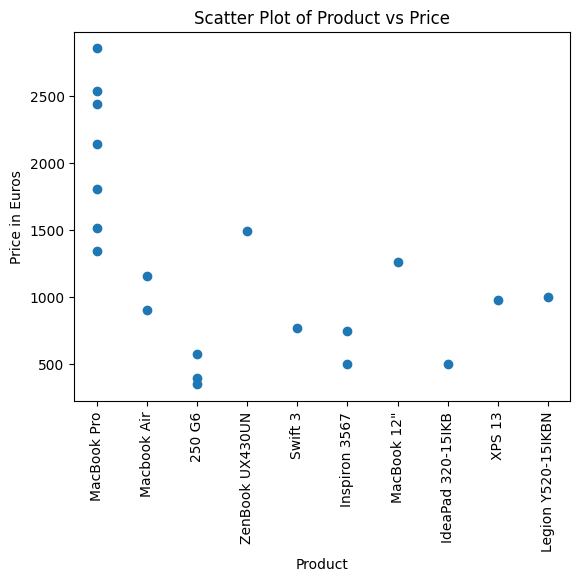


Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\nplt.scatter(df['Product'], df['Price_euros'])\nplt.xlabel('Product')\nplt.ylabel('Price in Euros')\nplt.title('Scatter Plot of Product vs Price')\nplt.xticks(rotation=90)\nplt.show()"}`


The scatter plot of Product vs Price has been generated. The x-axis represents the different products, and the y-axis represents the price in euros. The plot shows the distribution of prices for each product.

> Finished chain.


In [35]:
query = "plot scatter plot of Product and Price"
response = da_agent(query)

In [36]:
print(response["intermediate_steps"][-1][0].tool_input['query'])

import matplotlib.pyplot as plt
plt.scatter(df['Product'], df['Price_euros'])
plt.xlabel('Product')
plt.ylabel('Price in Euros')
plt.title('Scatter Plot of Product vs Price')
plt.xticks(rotation=90)
plt.show()
